<a href="https://colab.research.google.com/github/haykalfajjarr/minpro-datmin/blob/main/Minpro_Data_Mining_Tahap_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aproved Premium Insurance Prediction**

#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# **Business Understanding**


## **Business Objective**

Tujuan bisnis dari dataset ini adalah untuk menganalisis faktor-faktor yang mempengaruhi premi asuransi kesehatan. Hal ini dapat membantu perusahaan asuransi untuk:

Menetapkan premi yang lebih akurat dan kompetitif
Meningkatkan pemahaman tentang risiko yang terkait dengan berbagai kelompok pemohon
Mengembangkan produk dan layanan asuransi yang lebih sesuai dengan kebutuhan pelanggan





## **Assess Situation**

Premi asuransi kesehatan terus meningkat dalam beberapa tahun terakhir. Hal ini disebabkan oleh berbagai faktor, termasuk:

* Biaya perawatan kesehatan yang semakin mahal
* Bertambahnya jumlah orang yang memiliki penyakit kronis
* Penuaan populasi

Perusahaan asuransi perlu menemukan cara untuk mengelola biaya premi mereka agar tetap kompetitif. Salah satu cara untuk melakukannya adalah dengan menggunakan data untuk memprediksi risiko yang terkait dengan berbagai kelompok yang mengajukan.




## **Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk
memprediksi premi asuransi kesehatan berdasarkan faktor-faktor yang mempengaruhi.

Menganalisis faktor-faktor yang mempengaruhi premi asuransi kesehatan
Meningkatkan pemahaman tentang profil risiko berbagai kelompok yang mengajukan.




## **Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari sumber yang tersedia.

Selanjutnya, data akan dijelaskan karakteristiknya dan pola-pola yang menarik diidentifikasi.

Data kemudian dieksplorasi untuk mengidentifikasi korelasi dan hubungan antar variabel.

Selain itu, kualitas data akan dinilai dan masalah data akan diidentifikasi agar dapat diatasi dalam tahapan berikutnya.

#**Data Understanding**

## **Collect Initial Data**

Dataset ini saya dapatkan dari situs web kaggle.com, data ini berisikan informasi individu premi kesehatan.

https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction



In [ ]:
sumber = ("https://raw.githubusercontent.com/haykalfajjarr/minpro-datmin/main/insurance.csv")

In [ ]:
df = pd.read_csv(sumber)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## **Describe Data**

#### Informasi Dasar

In [ ]:
print(df)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]
Jumlah baris: 1338
Jumlah kolom: 7


Setelah dataset diakses, outputnya akan menunjukkan bahwa data tersebut terdiri dari 1338 baris dan 7 kolom

#### Informasi Lanjutan

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


dari data tersebut berisikan 7 kolom yang masing masing memiliki tipe data yang berbeda, berikut penjelasannya

1. **age** : kolom ini menggunakan tipe data int64, karena bilangan bulat tanpa desimal dan mewakili usia individu.

2. **sex** : kolom ini menggunakan tipe data object, karena kategori string dapat mewakili jenis kelamin ( laki-laki atau perempuan

3. **bmi** : kolom ini menggunakan tipe data float46, karena massa tubuh dapat berupa bilangan desimal, sehingga tipe data ini yang paling cocok untuk mewakilinya

4. **children** : kolom ini menggunakan tipe data int64, fungsinya untuk mewakili jumlah anak

5. **smoker** : kolom ini menggunakan tipe data object untuk mewakili status perokok yang mana hal tersebut termasuk kategori string

6. **region** : kolom ini menggunakan tipe data object untuk mewakili wilayah tempat tinggal

7. **expenses** : kolom ini menggunakan tipe data float46, yang mewakili biaya asuransi

#### Informasi Statistik Deskriptif

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


1. **Count** : Kolom ini menunjukkan berapa banyak nilai yang tidak kosong pada kolom. Nilai yang kosong tidak dihitung dalam perhitungan statistik. Contoh

2. **Mean** : Kolom ini menunjukkan rata-rata nilai pada kolom. Rata-rata dihitung dengan menjumlahkan semua nilai dan membaginya dengan jumlah nilai. Contoh rata-rata usia pada dataset adalah 31.07 tahun. Ini berarti bahwa rata-rata, individu dalam dataset berusia 31.07 tahun.

3. **Std** : Kolom ini menunjukkan deviasi standar nilai pada kolom. Deviasi standar adalah ukuran seberapa jauh nilai-nilai pada kolom tersebar dari rata-rata. Contoh deviasi standar BMI pada dataset adalah 4.77. Ini berarti bahwa nilai BMI pada dataset tersebar sekitar 4.77 unit dari rata-rata.

4. **Min** : Kolom ini menunjukkan nilai minimum pada kolom. Nilai minimum adalah nilai terendah pada kolom. Contoh nilai minimum biaya asuransi pada dataset adalah 1688.49. Ini berarti bahwa ada individu dalam dataset yang memiliki biaya asuransi sebesar 1688.49.

5. **25%, 50%, 75%** : Kolom ini menunjukkan kuartil pertama, median, dan kuartil ketiga pada kolom. Kuartil adalah nilai yang membagi data menjadi empat bagian yang sama. Contoh 25% data terendah untuk usia pada dataset adalah 28 tahun. Ini berarti bahwa 25% individu dalam dataset berusia 28 tahun atau lebih muda.
Median biaya asuransi pada dataset adalah 29915.14. Ini berarti bahwa 50% individu dalam dataset memiliki biaya asuransi yang lebih rendah dari 29915.14 dan 50% memiliki biaya asuransi yang lebih tinggi.
75% data terendah untuk biaya asuransi pada dataset adalah 44494.62. Ini berarti bahwa 75% individu dalam dataset memiliki biaya asuransi yang lebih rendah dari 44494.62.

6. **Max** : Kolom ini menunjukkan nilai maksimum pada kolom. Nilai maksimum adalah nilai tertinggi pada kolom. Contoh nilai maksimum biaya asuransi pada dataset adalah 63770.42. Ini berarti bahwa ada individu dalam dataset yang memiliki biaya asuransi sebesar 63770.42.

## **Exploratory Data Analysis**

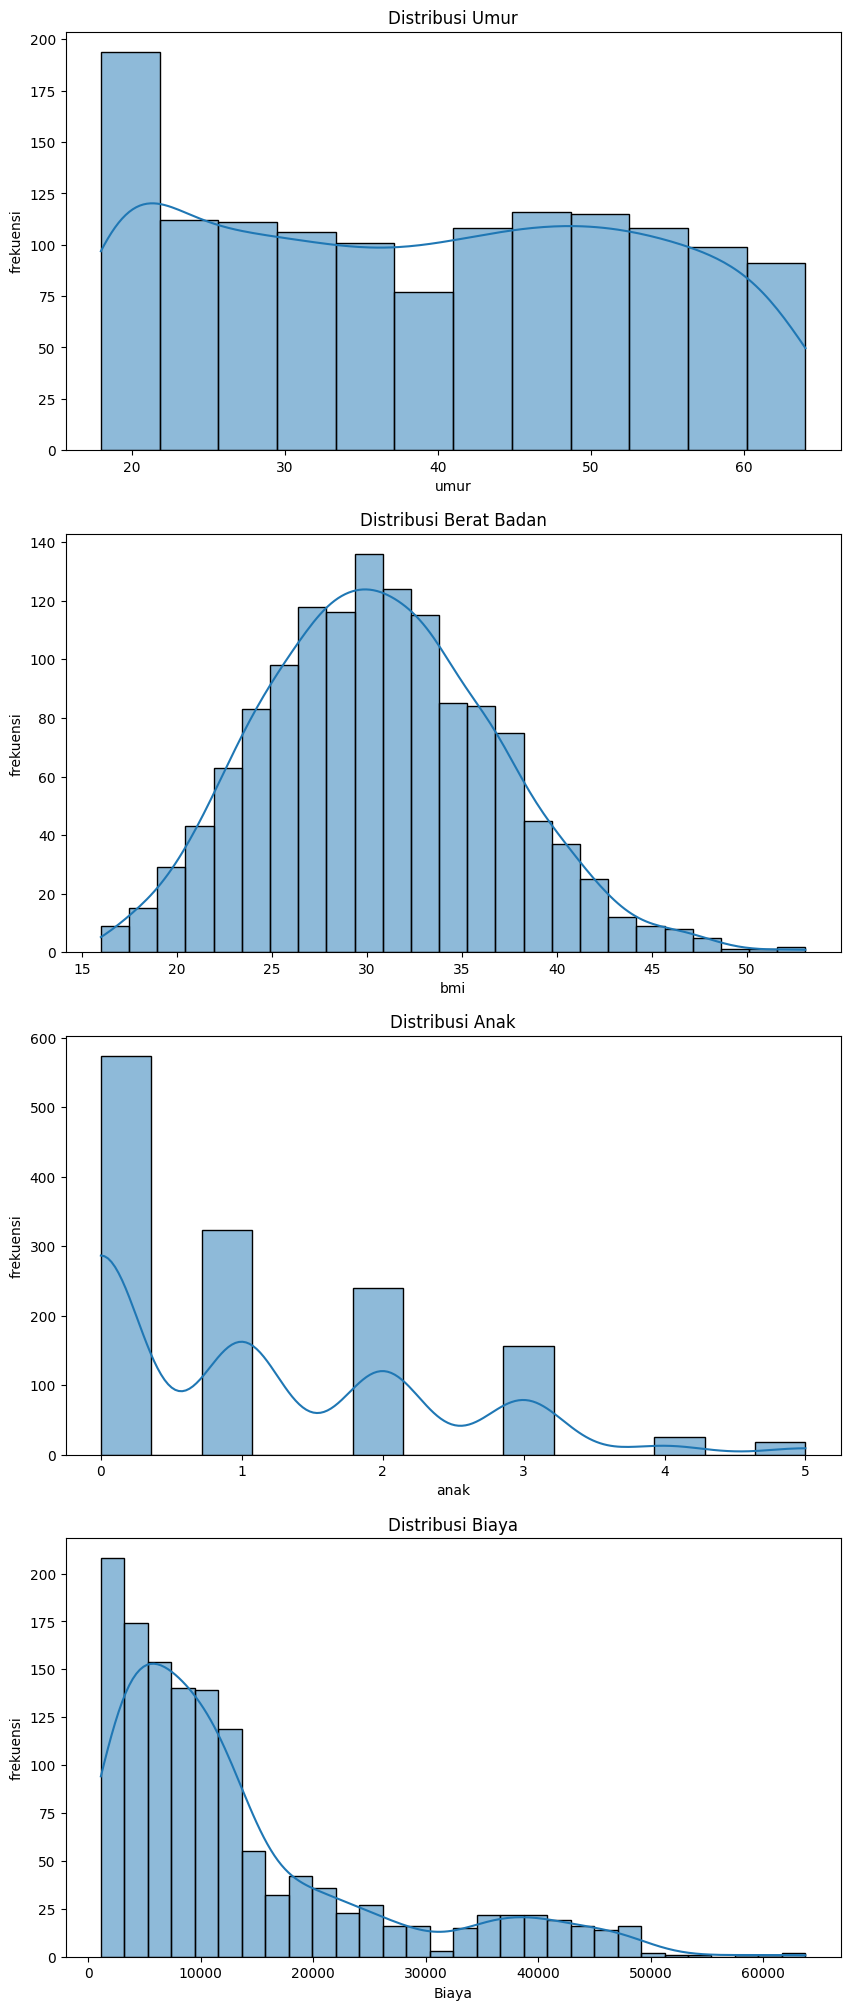

In [ ]:
fix, axes = plt.subplots(4, 1, figsize =(10,25))
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Umur')
axes[0].set_xlabel('umur')
axes[0].set_ylabel('frekuensi')

sns.histplot(df['bmi'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Berat Badan')
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('frekuensi')

sns.histplot(df['children'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Anak')
axes[2].set_xlabel('anak')
axes[2].set_ylabel('frekuensi')

sns.histplot(df['expenses'], kde=True, ax=axes[3])
axes[3].set_title('Distribusi Biaya')
axes[3].set_xlabel('Biaya')
axes[3].set_ylabel('frekuensi')
plt.show()

1. Distribusi Umur (Age Distribution)

Histogram menunjukkan distribusi usia terkonsentrasi pada usia 20-an dan 30-an.
Kurva KDE menunjukkan bentuk distribusi yang mendekati normal.
Mayoritas individu berada di usia produktif.

2. Distribusi Berat Badan (BMI Distribution)

Histogram menunjukkan distribusi BMI miring ke kanan, menunjukkan banyak individu memiliki BMI di atas rata-rata.
Kurva KDE menunjukkan distribusi yang tidak simetris dengan ekor panjang di sisi kanan.
Ada proporsi individu yang memiliki BMI tinggi, yang dapat menjadi faktor risiko kesehatan.

3. Distribusi Anak (Children Distribution)

Histogram menunjukkan distribusi jumlah anak terkonsentrasi pada 0 dan 1 anak.
Kurva KDE menunjukkan bentuk distribusi yang mendekati normal.
Mayoritas individu memiliki 0 atau 1 anak.

4. Distribusi Biaya (Cost Distribution)

Histogram menunjukkan distribusi biaya miring ke kanan, menunjukkan banyak individu memiliki biaya asuransi yang tinggi.
Kurva KDE menunjukkan distribusi yang tidak simetris dengan ekor panjang di sisi kanan.
Ada proporsi individu yang memiliki biaya asuransi tinggi, yang dapat menjadi beban finansial.

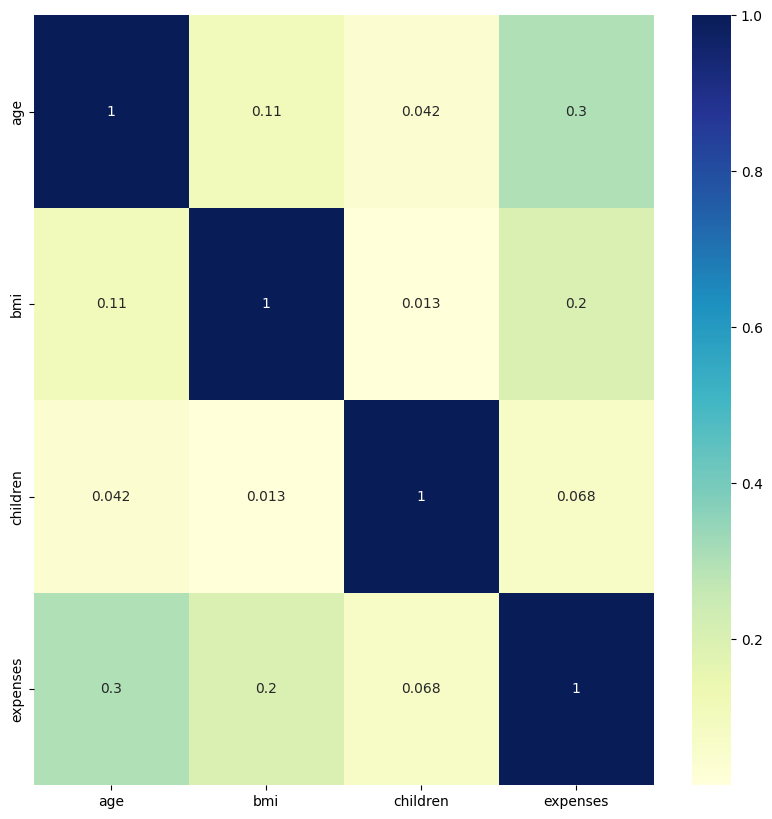

In [ ]:
plt.figure(figsize=(10, 10))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

Gambar diatas merupakan visualisasi heatmap yang menunjukkan korelasi antar data numerik yang ada dalam dataset. Setiap kotak pada heatmap tersebut mewakili korelasi antar 2 data numerik

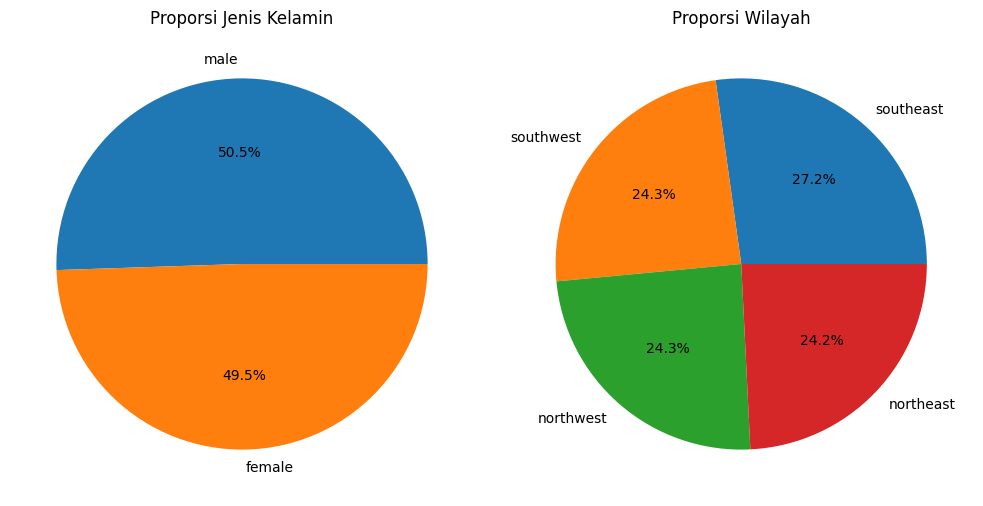

In [ ]:
jenis_kelamin = df["sex"]

proporsi_laki_laki = jenis_kelamin.value_counts()["male"] / len(jenis_kelamin)
proporsi_perempuan = jenis_kelamin.value_counts()["female"] / len(jenis_kelamin)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie([proporsi_laki_laki, proporsi_perempuan], labels=["male", "female"], autopct="%1.1f%%")
plt.title("Proporsi Jenis Kelamin")

plt.subplot(1, 2, 2)
pie = df['region'].value_counts()
a = pie.index
b = pie.values
plt.pie(b, labels=a, autopct="%1.1f%%")
plt.title("Proporsi Wilayah")

plt.tight_layout()
plt.show()

Gambar diatas merupakan visualisasi distribusi dari
1. jenis kelamin laki-laki dan perempuan, seperti yang diperlihatkan diatas, bagian biru merupakan laki-laki dan yang oranye merupakan perempuan dengan perbandingan 50.5% banding 49.5%.

2. wilayah, pada visualisasi diatas, setiap bagian mewakili proporsi jumlah data yang ada di setiap wilayah. Setiap bagian ditandai dengan nama wilayahnya, dan persentase jumlah data dari total jumlah data ditampilkan di setiap bagian.


## **Verify Data**

#### Missing Values

In [ ]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Pada keterangan di atas dilakukan operasi pemeriksaan untuk melihat apakah terdapat nilai kosong atau tidak

Berikut merupakan penjelasan untuk masing-masing dari kolom :

1. **age** : Tidak terdapat nilai kosong dalam kolom usia (age), sehingga jumlah nilai nullnya adalah 0.

2. **sex** : Tidak terdapat nilai kosong dalam kolom jenis kelamin (sex), sehingga jumlah nilai nullnya adalah 0.

3. **bmi** : Tidak terdapat nilai kosong dalam kolom BMI (bmi), sehingga jumlah nilai nullnya adalah 0.

4. **children** : Tidak terdapat nilai kosong dalam kolom jumlah anak (children), sehingga jumlah nilai nullnya adalah 0.

5. **smoker** : Tidak terdapat nilai kosong dalam kolom status perokok (smoker), sehingga jumlah nilai nullnya adalah 0.

6. **region** : Tidak terdapat nilai kosong dalam kolom wilayah (region), sehingga jumlah nilai nullnya adalah 0.

7. **expenses** : Tidak terdapat nilai kosong dalam kolom biaya asuransi (expenses), sehingga jumlah nilai nullnya adalah 0.

Dengan demikian, tidak terdapat nilai kosong dalam seluruh kolom pada dataset tersebut, sehingga data lengkap dan tidak perlu dilakukan penanganan khusus terhadap nilai kosong.

#### Outliers Values

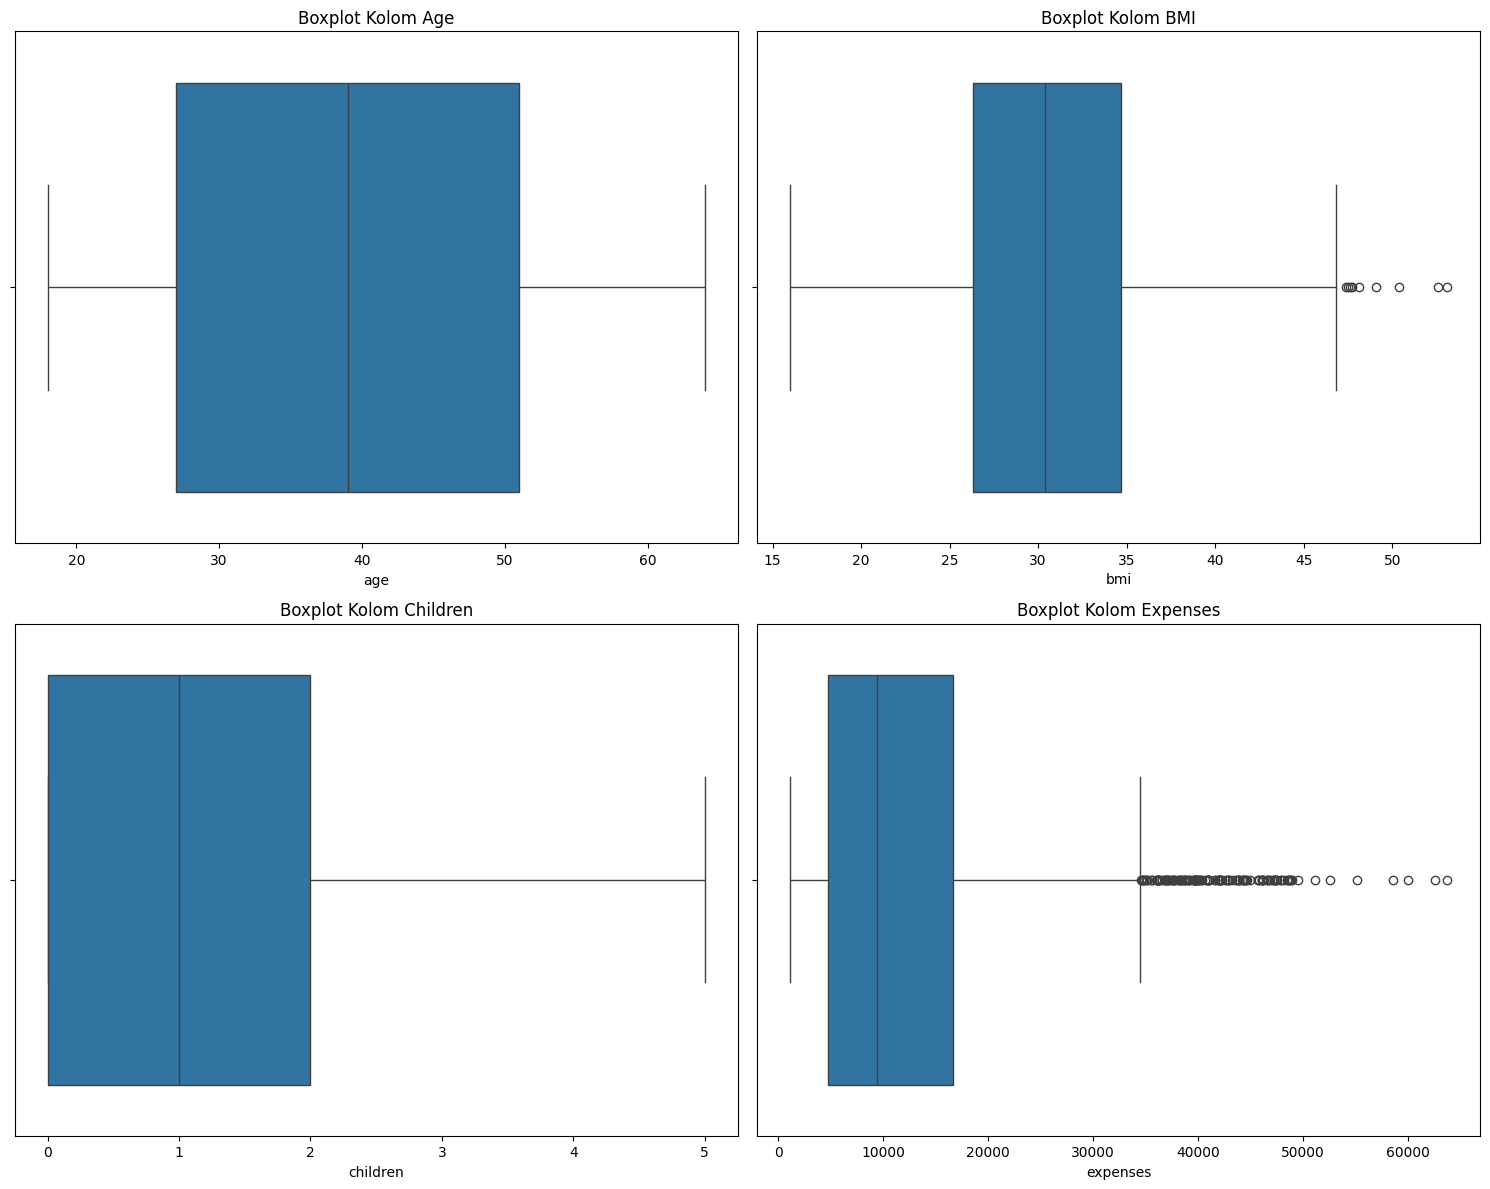

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='age')
plt.title("Boxplot Kolom Age")

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='bmi')
plt.title("Boxplot Kolom BMI")

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='children')
plt.title("Boxplot Kolom Children")

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='expenses')
plt.title("Boxplot Kolom Expenses")

plt.tight_layout()
plt.show()

Boxplot diatas menunjukkan distribusi data untuk setiap kolom pada dataframe df. Outliers atau data yang di luar batas akan ditandai sebagai titik-titik atau simbol bulat kecil yang terletak jauh dari garis vertikal pada box ( whiskers ).

1. Age (Usia): Tidak ada outliers, karena tidak ada titik-titik di luar whiskers.

2. BMI (Body Mass Index): Terdapat beberapa outliers di bagian atas, menunjukkan adanya beberapa data dengan BMI yang sangat tinggi.

3. Children (Jumlah Anak): Tidak ada outliers, karena tidak ada titik-titik di luar whiskers.

4. Expenses (Biaya Asuransi): Terdapat beberapa outliers di bagian atas, menunjukkan adanya beberapa data dengan biaya asuransi yang sangat tinggi.

#### Duplicated Values

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


Keterangan diatas menunjukkan adanya baris data yang memiliki value / nilai yang sama dengan baris data lainnya, sehingga dianggap sebagai data yang duplikat.

# **Data Preparation**

## **Data Cleaning**

###**Penanganan Missing Values**

#### **Pengecekkan Missing Value**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64


Diatas merupakan output yang berbentuk persentase yang akan dijadikan acuan dalam pengambilan keputusan terhadap apa yang akan dieksekusi pada nilai kosong.

#### **Hapus Missing value**

Dikarenakan pada saat pengecheckan tidak terdapat nilai kosong alias 0% di seluruh kolom, maka tidak diperlukan adanya tindakan apapun terhadap nilai kosong.

#### **Imputasi Missing Value**

Karena tidak terdapat nilai kosong yang perlu dihapus, maka tidak perlu adanya tindakan imputasi pada kolom tertentu.

#### **Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
expenses,0.0


Terlihat pada output diatas, dilakukan pengecheckan ulang untuk memastikan tidak terdapat nilai kosong, dan outputnya adalah sama sekali tidak terdapat nilai kosong

### **Penanganan Duplicated Values**

#### **Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses,bodymass_category


Pada output diatas, dilakukan pengecheckan nilai duplikat, dan outputnya adalah terdapat nilai duplikat pada row 581.

#### **Hapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

penjelasan

### **Penanganan Outliers**

#### **Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
bmi,0.673149
children,0.000000
expenses,10.396410


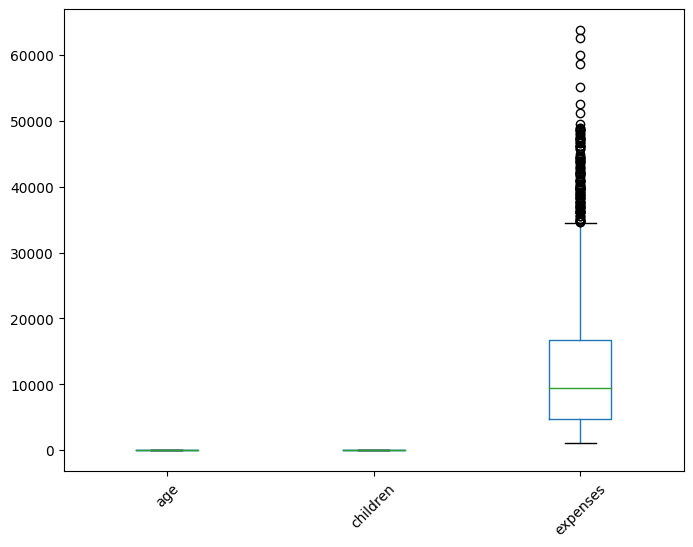

In [ ]:
boxplot = df.drop('bmi', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#### **Hapus Outliers**

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

penjelasan

#### **Imputasi Outliers**

In [ ]:
Q1 = df['expenses'].quantile(0.25)
Q3 = df['expenses'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['expenses']=np.where(df['expenses']>upper_whisker,upper_whisker,np.where(df['expenses']<lower_whisker,lower_whisker,df['expenses']))

<ipython-input-20-710caf50ac01>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expenses']=np.where(df['expenses']>upper_whisker,upper_whisker,np.where(df['expenses']<lower_whisker,lower_whisker,df['expenses']))


penjelasan

#### **Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
age,0.0
bmi,0.0
children,0.0
expenses,0.0


### **Construct Data**

#### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def bodymass_category(bmi):
    if bmi < 18.5:
        return "Thin"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 24.9 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obesity"

df['bodymass_category'] = df['bmi'].apply(bodymass_category)

<ipython-input-22-9d64aed7c383>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodymass_category'] = df['bmi'].apply(bodymass_category)


penjelasan

#### **Pengecekkan Hasil**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bodymass_category
0,19,female,27.9,0,yes,southwest,16884.92,Overweight
1,18,male,33.8,1,no,southeast,1725.55,Obesity
2,28,male,33.0,3,no,southeast,4449.46,Obesity
3,33,male,22.7,0,no,northwest,21984.47,Normal
4,32,male,28.9,0,no,northwest,3866.86,Overweight


penjelasan

## **Data Reduction**

####**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df2 = df.drop(['children'], axis=1)

penjelasan

#### Pengecekkan Hasil

In [ ]:
df2.head()

,age,sex,bmi,smoker,region,expenses,bodymass_category
0,19,female,27.9,yes,southwest,16884.92,Overweight
1,18,male,33.8,no,southeast,1725.55,Obesity
2,28,male,33.0,no,southeast,4449.46,Obesity
3,33,male,22.7,no,northwest,21984.47,Normal
4,32,male,28.9,no,northwest,3866.86,Overweight


penjelasan

## **Data Transformation**

### **Mapping**

In [ ]:
df2['sex'] = df2['sex'].map({'male':1,'female':0})

penjelasan

In [ ]:
df2['smoker'] = df2['smoker'].map({'yes':1,'no':0})

penjelasan

### **Encoding**

In [ ]:
df2 = pd.get_dummies(df2)

penjelasan

### **Pengecekkan Hasil**

In [ ]:
df2.head()

,age,sex,bmi,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bodymass_category_Normal,bodymass_category_Obesity,bodymass_category_Overweight,bodymass_category_Thin
0,19,0,27.9,1,16884.92,0,0,0,1,0,0,1,0
1,18,1,33.8,0,1725.55,0,0,1,0,0,1,0,0
2,28,1,33.0,0,4449.46,0,0,1,0,0,1,0,0
3,33,1,22.7,0,21984.47,0,1,0,0,1,0,0,0
4,32,1,28.9,0,3866.86,0,1,0,0,0,0,1,0


penjelasan